Sample features:
     HCC     WCC   LCC    Tamb  Uin       Q
0  0.001  0.0005  0.03  253.15  1.0  1272.0
1  0.001  0.0005  0.03  273.15  1.0  1272.0
2  0.001  0.0005  0.03  293.15  1.0  1272.0
3  0.001  0.0005  0.03  313.15  1.0  1272.0
4  0.001  0.0005  0.03  253.15  1.0  3132.0
Sample targets:
0    86.117
1    89.914
2    93.532
3    96.944
4    92.271
Name: Delp, dtype: float64
Epoch [1/1000], Loss: 0.3425, Val Loss: 0.1928


/Users/hanheelee/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch [2/1000], Loss: 0.1148, Val Loss: 0.0883
Epoch [3/1000], Loss: 0.0707, Val Loss: 0.0726
Epoch [4/1000], Loss: 0.0553, Val Loss: 0.0578
Early stopping counter 1 of 20
Epoch [5/1000], Loss: 0.0541, Val Loss: 0.0579
Early stopping counter 2 of 20
Epoch [6/1000], Loss: 0.0513, Val Loss: 0.0583
Epoch [7/1000], Loss: 0.0412, Val Loss: 0.0477
Epoch [8/1000], Loss: 0.0419, Val Loss: 0.0388
Early stopping counter 1 of 20
Epoch [9/1000], Loss: 0.0373, Val Loss: 0.0550
Early stopping counter 2 of 20
Epoch [10/1000], Loss: 0.0386, Val Loss: 0.0602
Early stopping counter 3 of 20
Epoch [11/1000], Loss: 0.0388, Val Loss: 0.0413
Epoch [12/1000], Loss: 0.0342, Val Loss: 0.0328
Epoch [13/1000], Loss: 0.0307, Val Loss: 0.0326
Early stopping counter 1 of 20
Epoch [14/1000], Loss: 0.0358, Val Loss: 0.0343
Early stopping counter 2 of 20
Epoch [15/1000], Loss: 0.0291, Val Loss: 0.0371
Early stopping counter 3 of 20
Epoch [16/1000], Loss: 0.0344, Val Loss: 0.0354
Early stopping counter 4 of 20
Epoch [17

Epoch [121/1000], Loss: 0.0135, Val Loss: 0.0166
Early stopping counter 1 of 20
Epoch [122/1000], Loss: 0.0134, Val Loss: 0.0166
Early stopping counter 2 of 20
Epoch [123/1000], Loss: 0.0135, Val Loss: 0.0166
Early stopping counter 3 of 20
Epoch [124/1000], Loss: 0.0134, Val Loss: 0.0167
Early stopping counter 4 of 20
Epoch [125/1000], Loss: 0.0134, Val Loss: 0.0167
Early stopping counter 5 of 20
Epoch [126/1000], Loss: 0.0135, Val Loss: 0.0166
Early stopping counter 6 of 20
Epoch [127/1000], Loss: 0.0135, Val Loss: 0.0169
Epoch [128/1000], Loss: 0.0134, Val Loss: 0.0166
Epoch [129/1000], Loss: 0.0134, Val Loss: 0.0165
Early stopping counter 1 of 20
Epoch [130/1000], Loss: 0.0133, Val Loss: 0.0168
Early stopping counter 2 of 20
Epoch [131/1000], Loss: 0.0133, Val Loss: 0.0166
Early stopping counter 3 of 20
Epoch [132/1000], Loss: 0.0133, Val Loss: 0.0167
Early stopping counter 4 of 20
Epoch [133/1000], Loss: 0.0133, Val Loss: 0.0166
Early stopping counter 5 of 20
Epoch [134/1000], Loss

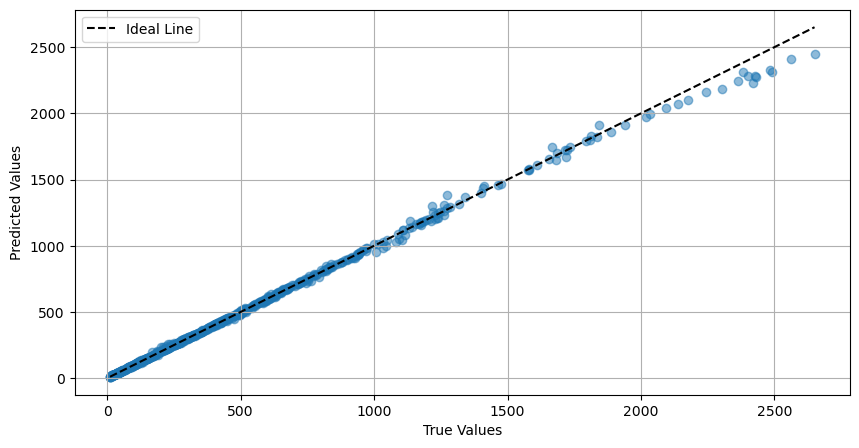

Model and scalers are saved and reloaded successfully.


In [10]:
#Adjustments: Early stopping and dynamic learning rate, robust scalar, and NN architecture
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import ReduceLROnPlateau

class RegressionNN(nn.Module):
    """
    A simple neural network for regression with three fully connected layers.

    Attributes:
        fc1 (torch.nn.Linear): First fully connected layer.
        fc2 (torch.nn.Linear): Second fully connected layer.
        fc3 (torch.nn.Linear): Output layer that outputs a single value.
        relu (torch.nn.ReLU): ReLU activation function used between layers.

    Methods:
        forward(x): Defines the forward pass of the neural network.
    """

    def __init__(self):
        """
        Initializes the neural network components.
        """
        super(RegressionNN, self).__init__()  # Initialize the superclass
        # Define the layers of the neural network
        self.fc1 = nn.Linear(6, 256)  # First fully connected layer with 6 inputs and 128 outputs
        self.fc2 = nn.Linear(256, 128)  # Second fully connected layer with 128 inputs and 64 outputs
        self.fc3 = nn.Linear(128, 64)    # Output layer with 64 inputs and 1 output (regression)
        self.fc4 = nn.Linear(64, 1)    # Output layer with 64 inputs and 1 output (regression)
        self.relu = nn.ReLU()  # Activation function used between layers

    def forward(self, x):
        """
        Defines the forward pass of the neural network.

        Args:
            x (Tensor): Input tensor containing batch of input features.

        Returns:
            Tensor: The output of the network after processing the input tensor `x`.
        """
        x = self.relu(self.fc1(x))  # Pass input through the first layer and apply ReLU activation
        x = self.relu(self.fc2(x))  # Pass through the second layer and apply ReLU activation
        x = self.relu(self.fc3(x))  # Pass through the third layer and apply ReLU activation
        x = self.fc4(x)  # Output layer produces final output, no activation (linear output)
        return x
    
def load_and_prepare_data(filepath):
    """
    Load and prepare data from a file for training a machine learning model.

    Args:
        filepath (str): Path to the data file.

    Returns:
        tuple: Tuple containing:
            - features (DataFrame): DataFrame containing the selected features.
            - targets (Series): Series containing the target variable.

    Description:
        - Reads data from a specified file using pandas, assuming whitespace as the delimiter.
        - Skips lines starting with '%', which are treated as comments.
        - Manually sets column names to match expected features and target descriptions.
        - Extracts specific columns for use as features and a single column as the target.
        - Prints sample data to help verify correct loading and parsing.
    """
    try:
        # Attempt to read the file. The file is expected to be a whitespace-delimited text file.
        # Rows beginning with '%' are ignored, assuming they are comments.
        data = pd.read_csv(filepath, delim_whitespace=True, comment='%', header=None)
        
        # Set the column names manually as the file does not contain header information.
        data.columns = ['HCC', 'WCC', 'LCC', 'Tamb', 'Uin', 'Q',
                        'Temperature1', 'Temperature2', 'Temperature3', 'Temperature4',
                        'Temperature5', 'Temperature6', 'Pressure1', 'Pressure2', 'Delp',
                        'Velocity1', 'Velocity2', 'Tsta', 'StackTemp2']

    except Exception as e:
        # Handle exceptions that may occur during file reading by printing an error message
        # and returning None values for features and targets.
        print(f"Error reading the data file: {e}")
        return None, None

    # Extract features and target from the dataset based on pre-defined column labels.
    # 'feature_labels' contains the names of the columns to be used as features.
    feature_labels = ['HCC', 'WCC', 'LCC', 'Tamb', 'Uin', 'Q']
    features = data.loc[:, feature_labels]  # Select columns for features
    targets = data['Delp']  # Select the column for target

    # Output a sample of the loaded features and targets to verify correct data loading.
    print("Sample features:")
    print(features.head())  # Print the first few rows of the features to check their correct loading.
    print("Sample targets:")
    print(targets.head())  # Print the first few rows of the targets to check their correct loading.

    # Return the extracted features and targets for further use in training or analysis.
    return features, targets

def preprocess_data(features, targets):
    """
    Preprocess the features and targets: scale data and convert to tensors.

    Args:
        features (DataFrame or ndarray): The input features to be scaled.
        targets (DataFrame or Series): The target values to be scaled.

    Returns:
        tuple: Tuple containing:
            - features_tensor (Tensor): Scaled features as a tensor.
            - targets_tensor (Tensor): Scaled targets as a tensor.
            - scaler_features (StandardScaler): Scaler used for features.
            - scaler_target (StandardScaler): Scaler used for targets.

    Description:
        - This function scales the features and targets using StandardScaler to normalize data, enhancing model performance.
        - It saves the scalers for use during model evaluation to inverse transform the outputs.
        - Converts the scaled data into PyTorch tensors for model training.
    """
    # Initialize scalers for features and targets
    scaler_features = RobustScaler()
    scaler_target = RobustScaler()

    try:
        # Scale features and fit the scaler to the features data
        features_scaled = scaler_features.fit_transform(features)
        # Scale targets and reshape if necessary to fit the scaler
        targets_scaled = scaler_target.fit_transform(targets.values.reshape(-1, 1))

        # Save the fitted scalers to disk for later use during inference
        joblib.dump(scaler_features, 'scaler_features.pkl')
        joblib.dump(scaler_target, 'scaler_target.pkl')
    except Exception as e:
        # Handle exceptions that might occur during scaling and report them
        print(f"Error scaling features or targets: {e}")
        return None, None, None  # Return None to indicate failure

    # Convert the scaled features and targets into PyTorch tensors for use in training
    features_tensor = torch.tensor(features_scaled, dtype=torch.float32)
    targets_tensor = torch.tensor(targets_scaled, dtype=torch.float32).view(-1, 1)

    # Return the tensors and the scalers
    return features_tensor, targets_tensor, scaler_features, scaler_target

def prepare_loaders(features_tensor, targets_tensor, batch_size=64, test_size=0.2, random_state=42):
    """
    Prepare DataLoader objects for both training and testing datasets.
    
    Args:
        features_tensor (Tensor): A tensor containing all input features.
        targets_tensor (Tensor): A tensor containing corresponding target values.
        batch_size (int): Number of samples in each batch to load. Default is 64.
        test_size (float): The proportion of the dataset to include in the test split. Default is 0.2.
        random_state (int): Controls the shuffling applied to the data before applying the split. Default is 42.

    Returns:
        Tuple[DataLoader, DataLoader]: Returns two DataLoader objects for the training set and the test set.
    """
    # Split the data into training and testing sets using the specified proportion.
    # The random_state parameter ensures that the split is reproducible, meaning
    # the same split will occur each time the function is run with the same parameters.
    features_train, features_test, targets_train, targets_test = train_test_split(
        features_tensor, targets_tensor, test_size=test_size, random_state=random_state)

    # Create TensorDataset objects that wrap the training and testing data.
    # TensorDataset is a dataset wrapping tensors where each sample will be
    # retrieved by indexing tensors along the first dimension.
    train_dataset = TensorDataset(features_train, targets_train)
    test_dataset = TensorDataset(features_test, targets_test)

    # Create DataLoader objects for the training data and testing data.
    # DataLoader defines how data is loaded in batches. 'shuffle=True' ensures that
    # the data is shuffled at every epoch for the training data.
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    # For testing data, shuffling is generally not necessary.
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Return both DataLoaders to be used in the training and testing phases.
    return train_loader, test_loader

def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=1000, patience=20):
    """
    Train a neural network model with dynamic learning rate adjustment and early stopping.

    Args:
        model (torch.nn.Module): The neural network model to be trained.
        train_loader (DataLoader): DataLoader for the training data containing features and labels.
        test_loader (DataLoader): DataLoader for the validation data to evaluate the model during training.
        criterion (torch.nn.modules.loss): The loss function used to evaluate the model's predictions.
        optimizer (torch.optim.Optimizer): The optimization algorithm used to update model parameters.
        num_epochs (int): Number of times the entire dataset is processed.
        patience (int): Number of epochs to wait for improvement before stopping.

    Returns:
        None
    """
    model.train()  # Set the model to training mode to enable features like Dropout and BatchNorm.
    scheduler = ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5, verbose=True)  # Scheduler for reducing the learning rate.
    best_loss = float('inf')  # Initialize the best observed loss with infinity for comparison.
    epochs_no_improve = 0  # Counter to track epochs without improvement.

    for epoch in range(num_epochs):  # Iterate over the number of epochs specified.
        running_loss = 0.0  # Variable to store the cumulative loss for this epoch.
        for inputs, labels in train_loader:  # Iterate over batches of data from the training loader.
            optimizer.zero_grad()  # Reset gradients to zero for a new optimization step.
            outputs = model(inputs)  # Forward pass: compute predictions from inputs.
            loss = criterion(outputs, labels)  # Compute loss between predictions and true labels.
            loss.backward()  # Backpropagate the errors to compute gradients.
            optimizer.step()  # Update model parameters using computed gradients.
            running_loss += loss.item()  # Accumulate the loss for this batch.

        # Validation loss calculation
        val_loss = 0.0  # Variable to store validation loss.
        model.eval()  # Set the model to evaluation mode, disabling training-specific operations like Dropout.
        with torch.no_grad():  # Disable gradient computation for efficiency.
            for inputs, labels in test_loader:  # Iterate over validation data batches.
                outputs = model(inputs)  # Compute model output.
                val_loss += criterion(outputs, labels).item()  # Sum up the loss for the batch.
        val_loss /= len(test_loader)  # Compute the average validation loss.

        # Dynamic learning rate adjustment based on validation loss.
        scheduler.step(val_loss)  # Adjust the learning rate based on the validation loss.

        # Early stopping logic:
        if val_loss < best_loss:  # Check if the current validation loss is lower than the best observed.
            best_loss = val_loss  # Update the best loss with the current validation loss.
            epochs_no_improve = 0  # Reset the no-improve counter.
        else:
            epochs_no_improve += 1  # Increment the no-improve counter.
            print(f'Early stopping counter {epochs_no_improve} of {patience}')
            if epochs_no_improve >= patience:  # Check if no improvement has been observed for 'patience' epochs.
                print('Early stopping!')  # Notify that early stopping is triggered.
                break  # Break out of the loop to stop training.

        # Log the training and validation loss.
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Val Loss: {val_loss:.4f}')

def evaluate_model(model, test_loader, criterion, scaler_target):
    """
    Evaluate the performance of a trained neural network model.

    Args:
        model (torch.nn.Module): The neural network model to evaluate.
        test_loader (DataLoader): DataLoader for the test dataset containing features and labels.
        criterion (torch.nn.modules.loss): Loss function to measure the accuracy of the model.
        scaler_target (scaler): A pre-fitted scaler (e.g., from sklearn) used to inverse transform the model's output.

    Description:
        - The model is set to evaluation mode, which disables layers like Dropout.
        - Loss and RMSE are calculated for the entire test dataset.
        - Predictions are inverse-transformed using the scaler to bring them back to the original scale.
        - A scatter plot is generated to visually compare the true values against the predicted values.
    """
    model.eval()  # Set the model to evaluation mode. This disables Dropout, etc.
    total_loss = 0
    total_rmse = 0
    predictions, actuals = [], []

    with torch.no_grad():  # Disable gradient computation inside this block
        for inputs, labels in test_loader:
            outputs = model(inputs)  # Forward pass: compute the model output

            # Detach the outputs and labels from the graph to convert them to numpy arrays for scaling
            outputs_np = outputs.detach().cpu().numpy()
            labels_np = labels.detach().cpu().numpy()

            # Apply the inverse transform to the outputs and labels
            outputs_inv_scaled = scaler_target.inverse_transform(outputs_np.reshape(-1, 1))
            labels_inv_scaled = scaler_target.inverse_transform(labels_np.reshape(-1, 1))

            # Convert numpy arrays back to tensors for loss calculation
            outputs_tensor = torch.tensor(outputs_inv_scaled, dtype=torch.float32)
            labels_tensor = torch.tensor(labels_inv_scaled, dtype=torch.float32)

            # Calculate loss using the criterion passed to the function
            loss = criterion(outputs_tensor, labels_tensor)
            total_loss += loss.item() * inputs.size(0)  # Aggregate the total loss

            # Calculate RMSE for this batch and accumulate
            rmse = np.sqrt(mean_squared_error(labels_inv_scaled, outputs_inv_scaled))
            total_rmse += rmse * inputs.size(0)  # Aggregate the total RMSE

            # Store predictions and actuals for later plotting
            predictions.extend(outputs_inv_scaled.flatten())
            actuals.extend(labels_inv_scaled.flatten())

    # Calculate the average loss and RMSE over all batches in the test set
    mean_loss = total_loss / len(test_loader.dataset)
    mean_rmse = total_rmse / len(test_loader.dataset)
    relative_error = (mean_rmse / np.mean(actuals)) * 100  # Calculate relative error as a percentage

    # Output the calculated metrics
    print(f'Test MSE: {mean_loss:.4f}')
    print(f'Test RMSE: {mean_rmse:.4f}')
    print(f'Relative Error: {relative_error:.2f}%')

    # Plotting true values vs predicted values
    plt.figure(figsize=(10, 5))
    plt.scatter(actuals, predictions, alpha=0.5)
    plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'k--', label='Ideal Line')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()

    # The function does not need to return anything unless you wish to use the metrics outside of this function.

def main():
    # Main function to run the training and evaluation process.
    filepath = '/Users/hanheelee/Desktop/Projects/00_ML_Fuel_Cell/Set 1.txt'  # Path to data file
    features, targets = load_and_prepare_data(filepath)
    if features is None or targets is None:
        print("Failed to load data.")
        return
    
    # Process features and targets with scaling
    features_tensor, targets_tensor, scaler_features, scaler_target = preprocess_data(features, targets)
    if features_tensor is None or targets_tensor is None:
        print("Failed to preprocess data.")
        return

    # Prepare data loaders
    train_loader, test_loader = prepare_loaders(features_tensor, targets_tensor)
    
    # Create model instance
    model = RegressionNN()  # Instantiate the model
    criterion = nn.L1Loss()  # Loss function for regression
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # Optimizer
    
    # Train the model
    train_model(model, train_loader, test_loader, criterion, optimizer)
    
    # Evaluate the model
    evaluate_model(model, test_loader, criterion, scaler_target)  # Pass the scaler_target to use for inverse scaling

    # Save the model's state dictionary and scalers
    torch.save(model.state_dict(), 'model.pth')
    joblib.dump(scaler_features, 'scaler_features.pkl')
    joblib.dump(scaler_target, 'scaler_target.pkl')

    # Load the model's state dictionary
    loaded_model = RegressionNN()
    loaded_model.load_state_dict(torch.load('model.pth'))
    loaded_model.eval()
    
    print("Model and scalers are saved and reloaded successfully.")

if __name__ == "__main__":
    main()  # Execute the main function if the script is run directly.